<a href="https://colab.research.google.com/github/sridevibonthu/EVA4Phase2/blob/master/Session3/notebooks/E4P2_Face_Alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip uninstall opencv-python

In [ ]:
pip install opencv-python==3.4.0.14

In [ ]:
#Download the 5-pt alignment file
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2

--2020-08-15 14:40:42--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2.1’

shape_predictor_5_f 100%[===================>]   5.44M  1.52MB/s    in 3.9s    

2020-08-15 14:40:46 (1.39 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2.1’ saved [5706710/5706710]

bzip2: Output file shape_predictor_5_face_landmarks.dat already exists.


In [ ]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

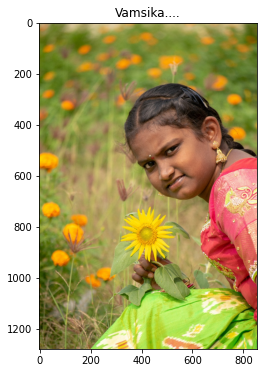

In [ ]:
#Landmark model location
PREDICTOR_PATH = "/content/shape_predictor_5_face_landmarks.dat"

#Get the face detector
faceDetector = dlib.get_frontal_face_detector()
#The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

#Read image
im = cv2.imread("/content/vamsika.jpg")

plt.imshow(im[:, :, ::-1])
plt.title("Vamsika....")
plt.show()

In [ ]:
#Detect landmarks
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

points = np.array(points)

#Convert image to floating point in the range 0 to 1
im = np.float32(im)/255.0

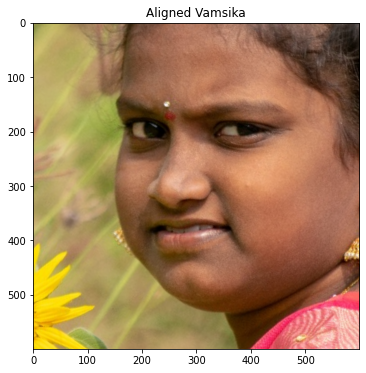

In [ ]:
#Dimensions of output image
h = 600
w = 600

#Normalize the image to output coordinates
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

imNorm = np.uint8(imNorm*255)

#Display the result
plt.imshow(imNorm[:, :, ::-1])
plt.title("Aligned Vamsika")
plt.show()